In [3]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from environment.CubeN import CubeN
from networks.CubeNetRes import CubeNet

In [4]:
env = CubeN(2)
net = CubeNet(2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [5]:
loadPath = "Cube-2,ScrambleDepth-30,Epochs-5000,lr-0.000100,residual,2705.pt"

net.to(device)
net.load_state_dict(torch.load(loadPath))
net.eval()

CubeNet(
  (resBlocks): ModuleList(
    (0): ResidualBlock(
      (layers): Sequential(
        (0): Linear(in_features=1000, out_features=1000, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Linear(in_features=1000, out_features=1000, bias=True)
      )
      (combinedLayers): Sequential(
        (0): ReLU()
        (1): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (firstBlock): Sequential(
    (0): Linear(in_features=144, out_features=1000, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (finalLayer): Linear(in_features=1000, out_features=1, bias=True)
)

In [19]:
scrambleNumbers = list(range(1,30))
avgCTG = []
numScrambles = 1000

In [20]:
for i in scrambleNumbers:
    scrambles = env.generateScrambles(numScrambles, i,i)
    scramblesOneHot = env.oneHotEncoding(scrambles)
    ctg = net(scramblesOneHot.to(device))
    avgCTG.append(torch.mean(ctg).item())
    clear_output()
    print(f'Done {i}')

Done 29


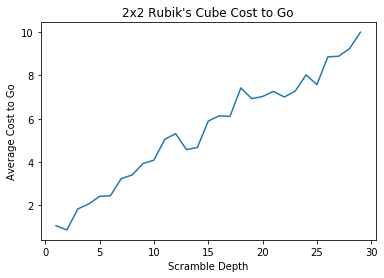

In [21]:
plt.plot(scrambleNumbers, avgCTG)
plt.ylabel("Average Cost to Go")
plt.xlabel("Scramble Depth")
plt.title("2x2 Rubik's Cube Cost to Go")
plt.show()

In [23]:
from environment.PuzzleN import PuzzleN
from networks.PuzzleNetConv import PuzzleNet

env = PuzzleN(15)
net = PuzzleNet(15)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [24]:
loadPath = "Puzzle-15,ScrambleDepth=300,conv.pt"

net.to(device)
net.load_state_dict(torch.load(loadPath))
net.eval()

PuzzleNet(
  (convLayers): Sequential(
    (0): Conv2d(16, 100, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(100, 200, kernel_size=(2, 2), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(200, 100, kernel_size=(2, 2), stride=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear): Sequential(
    (0): Linear(in_features=900, out_features=100, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [25]:
scrambleNumbers = list(range(1,1000,10))
avgCTG = []
numScrambles = 100

In [26]:
for i in scrambleNumbers:
    scrambles = env.generateScrambles(numScrambles, i,i)
    scramblesOneHot = env.oneHotEncoding(scrambles)
    ctg = net(scramblesOneHot.to(device))
    avgCTG.append(torch.mean(ctg).item())
    clear_output()
    print(f'Done {i}')

Done 991


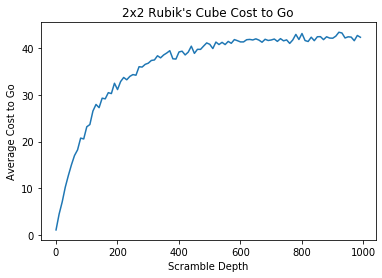

In [27]:
plt.plot(scrambleNumbers, avgCTG)
plt.ylabel("Average Cost to Go")
plt.xlabel("Scramble Depth")
plt.title("15-Puzzle Cost to Go")
plt.show()